In [63]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import pandas as pd

In [64]:
with open('new_obj_categories.txt', 'r') as f:
    foil2_categories = [l.split()[0] for l in f.readlines()]

In [65]:
def get_coco_counts(file_name):
    
    with open(file_name) as in_file:
        coco = json.load(in_file)

    counts = defaultdict(int)

    for tc in coco['annotations']:
        caption = tc['caption']
        
        for cat in foil2_categories:

            if cat in caption.lower():
                counts[cat] += 1

    return counts

In [66]:
train_counts_coco = get_coco_counts("annotations_trainval/captions_train2017.json")
val_counts_coco = get_coco_counts("annotations_trainval/captions_val2017.json")

In [67]:
categories = []
train_counts = []
val_counts = []

for cat in foil2_categories:
    categories.append(cat)
    train_counts.append(train_counts_coco[cat])
    val_counts.append(val_counts_coco[cat])
    
train_sum = sum(train_counts)
val_sum = sum(val_counts)

train_counts = [c/train_sum for c in train_counts] 
val_counts = [c/val_sum for c in val_counts] 

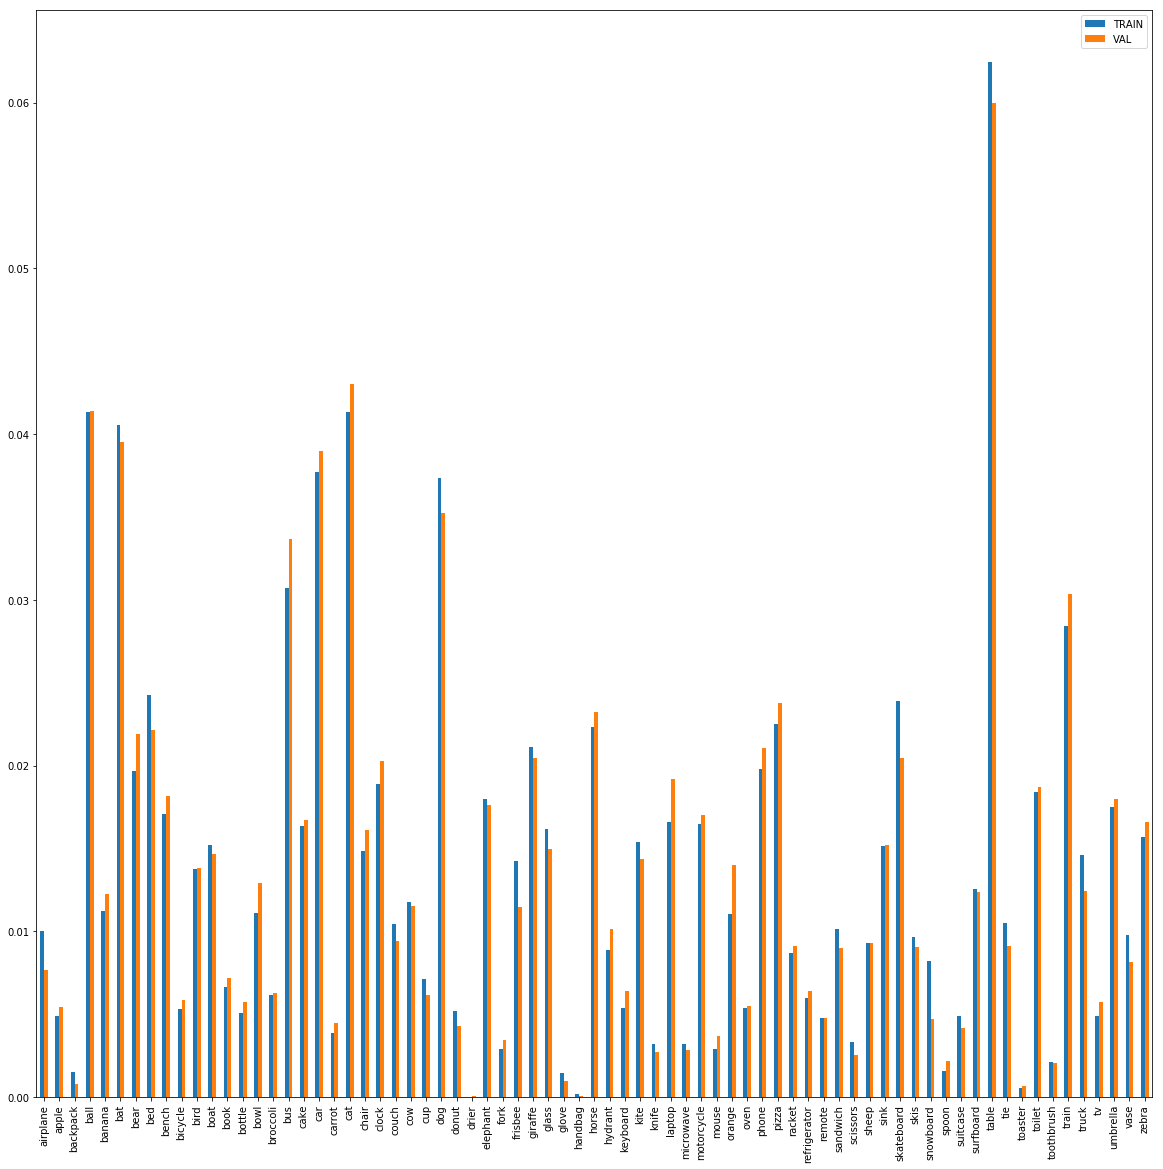

In [68]:
df = pd.DataFrame(np.c_[train_counts, val_counts], index=categories, columns=['TRAIN', 'VAL'])
df.plot.bar(figsize=(20,20))
plt.savefig('pd_COCO.png')
plt.show()

In [69]:
with open('train_dataset.json', 'r') as f:
    train = json.load(f)

with open('test_dataset.json', 'r') as f:
    test = json.load(f)

In [70]:
#loop over every sentence to count the occurrences
#corpus frequencies
#BUT CONTAINS MULTIPLE FOIL SENTENCES, HARDEST FOIL SENTENCES ARE NOT SELECTED YET

foil_counts_train = defaultdict(int)
orig_counts_train = defaultdict(int)

orig_normalized_train = defaultdict(float)
foil_normalized_train = defaultdict(float)

print('TRAIN SET')
print('***Category-Orig-Foil***')
for cat in foil2_categories:
        
    for t in train['images']:
        
        if cat in t['sentences'][0]['raw'].lower():
            
            tf_pair = t['targetfoilPair']

            if tf_pair == 'Original':
                orig_counts_train[cat] += 1
            else:
                foil_counts_train[cat] += 1    
                
foil_sum = sum(foil_counts_train)
orig_sum = sum(orig_counts_train)

for f in sorted(foil_counts_train):
    print(f, orig_counts_train[f], foil_counts_train[f]) 
    orig_normalized_train[f] = orig_counts_train[f]/orig_sum
    foil_normalized_train[f] = foil_counts_train[f]/foil_sum
    

TRAIN SET
***Category-Orig-Foil***
airplane 4655 36431
apple 2036 22996
backpack 667 2998
ball 1262 23719
banana 4367 17486
bat 12826 42306
bear 9819 48694
bed 13119 34707
bench 9035 7329
bicycle 2429 44248
bird 6069 29718
boat 6734 44192
book 2772 20299
bottle 2303 5185
bowl 5491 10221
broccoli 3371 9290
bus 14804 17476
cake 8603 25415
car 16081 69849
carrot 1395 12072
cat 20528 60623
chair 6704 23711
clock 10546 8165
couch 5402 29950
cow 4279 49040
cup 3168 9759
dog 20074 63457
donut 1629 6982
drier 4 16108
elephant 7959 49110
fork 1502 7889
frisbee 8021 18455
giraffe 10993 43863
glass 5112 20288
glove 162 11395
handbag 61 5150
horse 10116 26778
hydrant 724 1574
keyboard 2926 7800
kite 6755 11073
knife 1746 9700
laptop 9199 16063
microwave 1728 12813
motorcycle 8098 13165
mouse 1610 11713
orange 5101 19627
oven 2750 9999
phone 2983 18071
pizza 12765 13968
racket 133 14936
refrigerator 3139 9698
remote 2195 6849
sandwich 5267 19254
scissors 1877 683
sheep 5303 41338
sink 7934 13683
sk

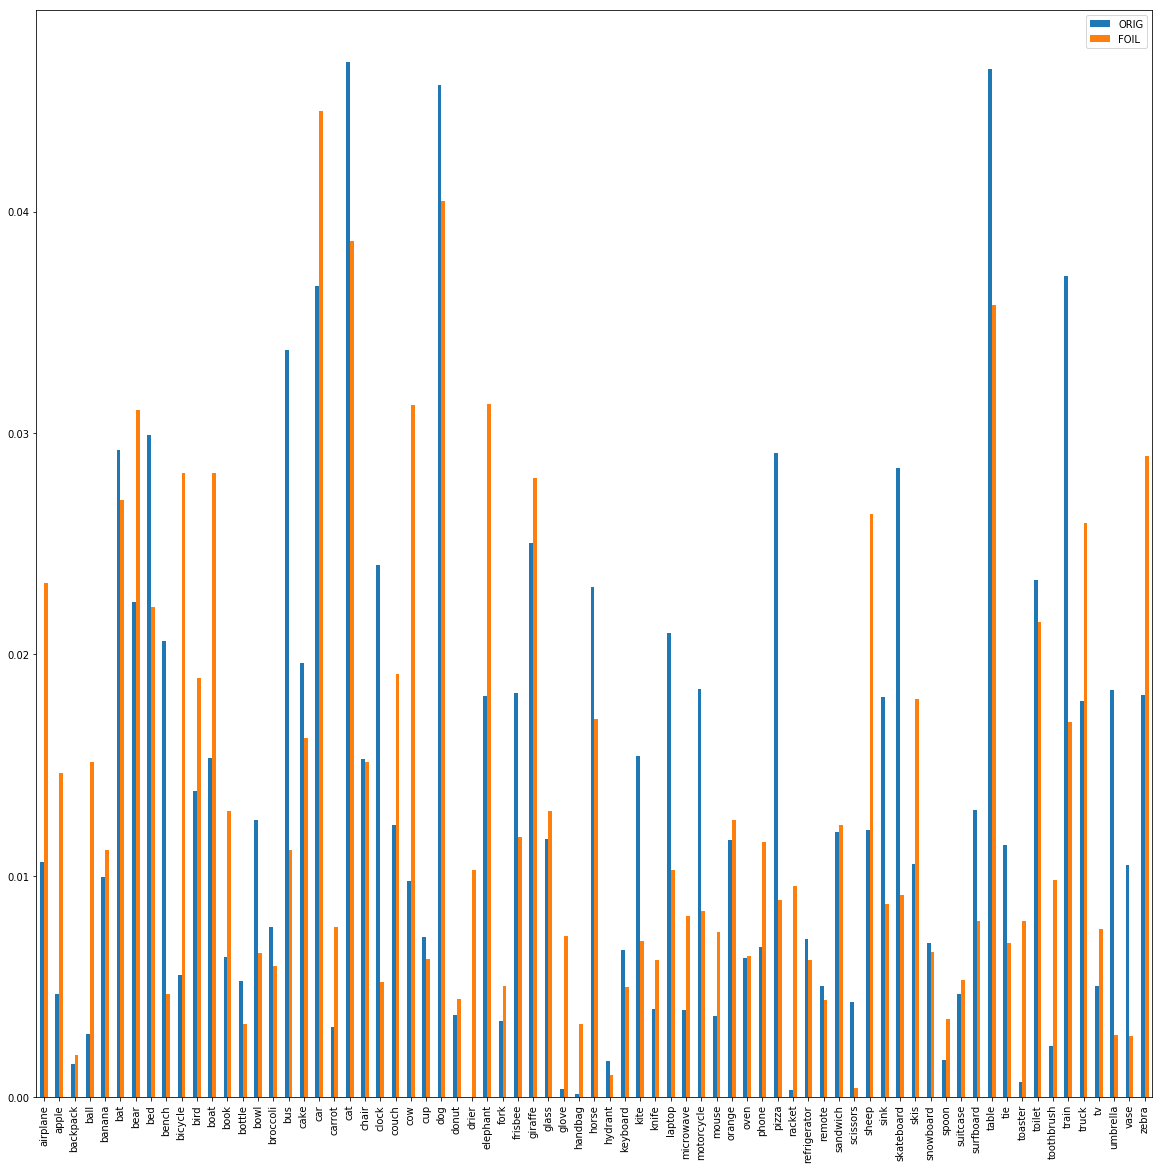

In [71]:
foil_sum = sum(foil_counts_y)
orig_sum = sum(orig_counts_y)

foil_counts = [c/foil_sum for c in foil_counts_y]
orig_counts = [c/orig_sum for c in orig_counts_y]

df = pd.DataFrame(np.c_[orig_counts, foil_counts], index=categories_x, columns=['ORIG', 'FOIL'])
df.plot.bar(figsize=(20,20))
plt.savefig('pd_TRAIN.png')
plt.show()

In [72]:
#loop over every sentence to count the occurrences
#corpus frequencies
#BUT CONTAINS MULTIPLE FOIL SENTENCES, HARDEST FOIL SENTENCES ARE NOT SELECTED YET

foil_counts_test = defaultdict(int)
orig_counts_test = defaultdict(int)

categories_x = []
foil_counts_y = []
orig_counts_y = []

print('TRAIN SET')
print('***Category-Orig-Foil***')
for cat in foil2_categories:
    
    categories_x.append(cat)
    
    for t in test['images']:
        
        if cat in t['sentences'][0]['raw'].lower():
            
            tf_pair = t['targetfoilPair']

            if tf_pair == 'Original':
                orig_counts_test[cat] += 1
            else:
                foil_counts_test[cat] += 1    
                
    foil_counts_y.append(foil_counts_test[cat])
    orig_counts_y.append(orig_counts_test[cat])
                
for f in sorted(foil_counts_test):
    print(f, orig_counts_test[f], foil_counts_test[f]) 

TRAIN SET
***Category-Orig-Foil***
airplane 157 1517
apple 90 969
backpack 16 105
ball 73 971
banana 187 778
bat 539 1823
bear 438 2059
bed 517 1437
bench 408 362
bicycle 121 1889
bird 279 1203
boat 270 1949
book 132 876
bottle 116 319
bowl 281 595
broccoli 143 535
bus 727 759
cake 366 1051
car 687 3082
carrot 71 548
cat 910 2703
chair 318 1086
clock 475 277
couch 195 1226
cow 192 2010
cup 110 401
dog 801 2754
donut 51 351
drier 0 683
elephant 302 2137
fork 75 419
frisbee 261 634
giraffe 423 1848
glass 209 899
glove 1 446
handbag 1 248
horse 439 1144
hydrant 38 88
keyboard 148 419
kite 278 389
knife 59 429
laptop 453 848
microwave 63 515
motorcycle 359 420
mouse 87 620
orange 288 1024
oven 118 421
phone 162 929
pizza 562 588
racket 6 578
refrigerator 142 427
remote 89 369
sandwich 196 900
scissors 62 29
sheep 222 1763
sink 336 639
skateboard 448 504
skis 183 1016
snowboard 73 350
spoon 46 287
suitcase 67 199
surfboard 230 438
table 822 2323
tie 178 497
toaster 17 519
toilet 440 1342
to

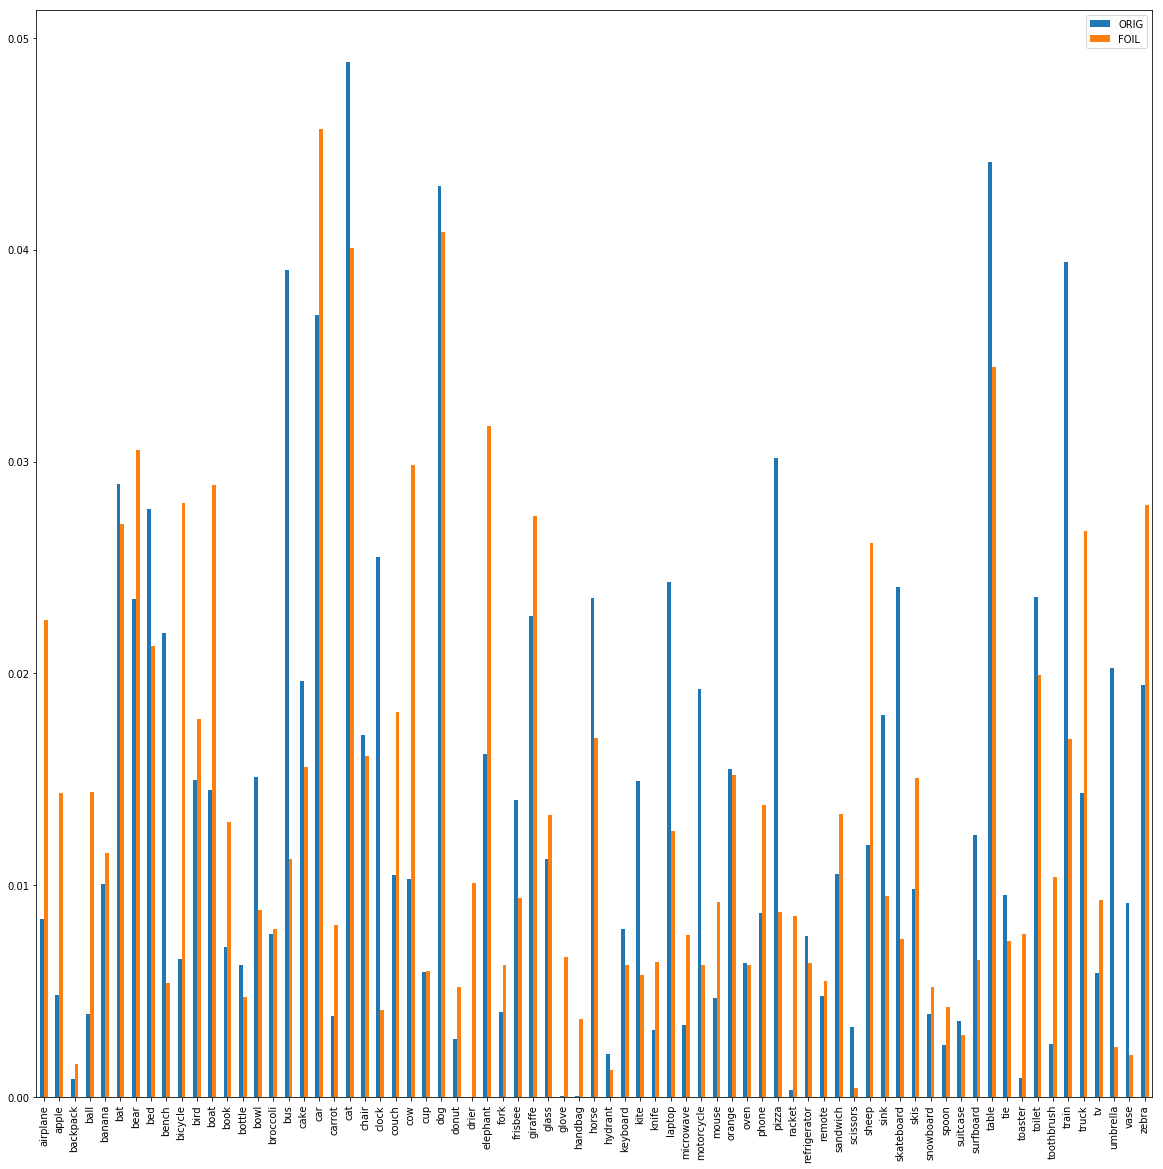

In [73]:
foil_sum = sum(foil_counts_y)
orig_sum = sum(orig_counts_y)

foil_counts = [c/foil_sum for c in foil_counts_y]
orig_counts = [c/orig_sum for c in orig_counts_y]

df = pd.DataFrame(np.c_[orig_counts, foil_counts], index=categories_x, columns=['ORIG', 'FOIL'])
df.plot.bar(figsize=(20,20))
plt.savefig('pd_TEST.png')
plt.show()